<center>
  <a href="2.13-Example%20of%20Logistic%20Regression.ipynb">Previous Page</a> | <a href="./">Content Page</a> | <a href="2.15-Example Regression.ipynb">Example of Regression</a></center>
</center>

# 2.14-Project Logistic Regression

In [5]:
import pandas as pd
import numpy as np


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [7]:
df=pd.read_csv('resale_discrete.csv')

In [8]:
df.columns

Index(['Unnamed: 0', 'month', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price'],
      dtype='object')

In [9]:
df=df[['floor_area_sqm', 'resale_price', 'resale_price']]
df.columns=['floor_area_sqm', 'resale_price', 'class_name']

In [10]:
y=df['resale_price']
X=df[['floor_area_sqm']]


In [11]:
y=y.map({'Low':0, 'Medium':1, 'High':2}) 

In [12]:
class_names=['Low', 'Medium', 'High']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
logreg = LogisticRegression()



In [15]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_pred=logreg.predict(X_test)

In [17]:
#the above can be simplify using the following
y_pred1=logreg.fit(X_train, y_train).predict(X_test)

In [18]:
a=y_pred==y_pred1

In [19]:
scores = cross_val_score(logreg, X, y, cv=5)
scores    

array([0.60447761, 0.60349127, 0.59398496, 0.58145363, 0.61403509])

In [20]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.60 (+/- 0.02)


In [21]:
metrics.accuracy_score(y_test, y_pred) 

0.558

In [22]:
confusion_matrix(y_test, y_pred)

array([[119,   9,  21],
       [ 48,  39, 102],
       [ 24,  17, 121]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

             precision    recall  f1-score   support

        Low       0.62      0.80      0.70       149
     Medium       0.60      0.21      0.31       189
       High       0.50      0.75      0.60       162

avg / total       0.57      0.56      0.52       500



https://stats.stackexchange.com/questions/117654/what-does-the-numbers-in-the-classification-report-of-sklearn-mean

In [24]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,119,9,21,149
1,48,39,102,189
2,24,17,121,162
All,191,65,244,500


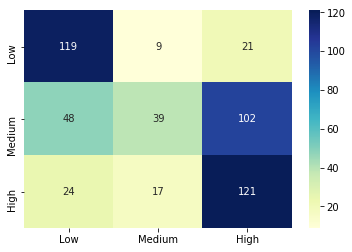

In [26]:
cnf_matrix = confusion_matrix(y_test, y_pred)
#g=pd.DataFrame(cnf_matrix, index=('a','b','c'), columns=('a','b','c'))
g=pd.DataFrame(cnf_matrix, index=class_names, columns=class_names)


import seaborn as sns
sns.heatmap(g, annot=True, fmt="d",cmap="YlGnBu")

Confusion matrix, without normalization
[[119   9  21]
 [ 48  39 102]
 [ 24  17 121]]


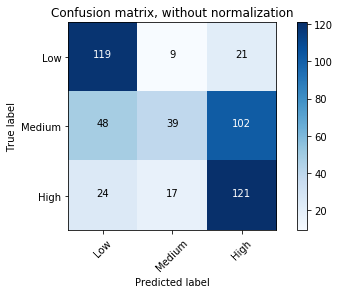

In [25]:

import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

<center>
  <a href="2.13-Example%20of%20Logistic%20Regression.ipynb">Previous Page</a> | <a href="./">Content Page</a> | <a href="2.15-Example Regression.ipynb">Example of Regression</a></center>
</center>